In [1]:
import zipfile
import os

zip_path = "/content/binaryclassificationwithabankchurndataset.zip"
extract_folder = "/content/bank_data"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


os.listdir(extract_folder)

['sample_submission.csv', 'test.csv', 'train.csv']

In [2]:
import pandas as pd

train_df = pd.read_csv('/content/bank_data/train.csv')
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [3]:
test_df = pd.read_csv('/content/bank_data/test.csv')
sample_sub_df = pd.read_csv('/content/bank_data/sample_submission.csv')
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15732563.0,Hs?,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,15001,15727041.0,Ma,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,15002,15753679.0,K?,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,15003,15581554.0,H?,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,15004,15773723.0,Bellucci,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


In [4]:

train_path = '/content/bank_data/train.csv'
df = pd.read_csv(train_path)

df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [5]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [9]:
# Kerakli kutubxonalar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import *
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/bank_data/train.csv')
df.head()


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [ ]:
df.shape

(15000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


In [10]:
df.corr(numeric_only=True)

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,1.000000,-0.013143,0.002450,0.008301,0.010274,0.002993,-0.003234,0.007082,0.012198,0.006161,-0.015533
CustomerId,-0.013143,1.000000,0.014209,-0.001726,-0.005906,-0.005943,0.006489,-0.015185,0.008342,-0.005803,-0.004122
CreditScore,0.002450,0.014209,1.000000,-0.010207,0.005782,0.011393,0.009826,0.000844,0.015396,0.015829,-0.052375
Age,0.008301,-0.001726,-0.010207,1.000000,-0.012750,0.090285,-0.169409,-0.007544,-0.026430,0.004344,0.449425
Tenure,0.010274,-0.005906,0.005782,-0.012750,1.000000,-0.014872,0.016087,0.021382,-0.010231,0.008884,-0.032897
Balance,0.002993,-0.005943,0.011393,0.090285,-0.014872,1.000000,-0.423496,-0.018996,-0.021580,-0.003853,0.160062
NumOfProducts,-0.003234,0.006489,0.009826,-0.169409,0.016087,-0.423496,1.000000,-0.001089,0.047784,0.002612,-0.312812
HasCrCard,0.007082,-0.015185,0.000844,-0.007544,0.021382,-0.018996,-0.001089,1.000000,-0.026277,-0.012787,-0.010670
IsActiveMember,0.012198,0.008342,0.015396,-0.026430,-0.010231,-0.021580,0.047784,-0.026277,1.000000,0.003154,-0.188748
EstimatedSalary,0.006161,-0.005803,0.015829,0.004344,0.008884,-0.003853,0.002612,-0.012787,0.003154,1.000000,0.035193


Ma'lumotlarni tozalash

In [11]:
# keraksiz ustunlarni olib tashlaymiz
df = df.drop(columns=['id', 'CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


Vizual Data Analysis

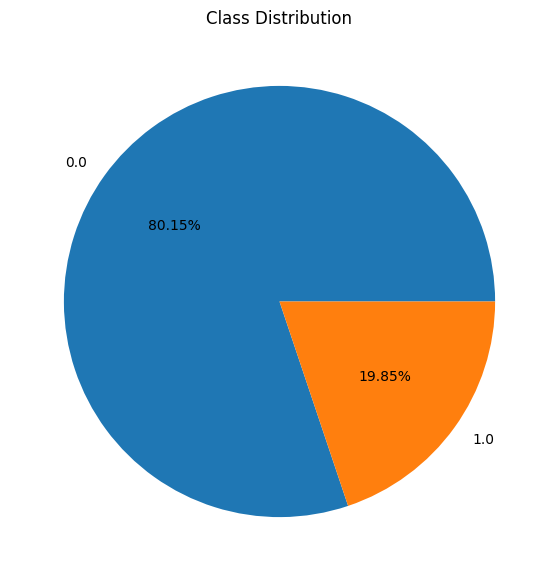

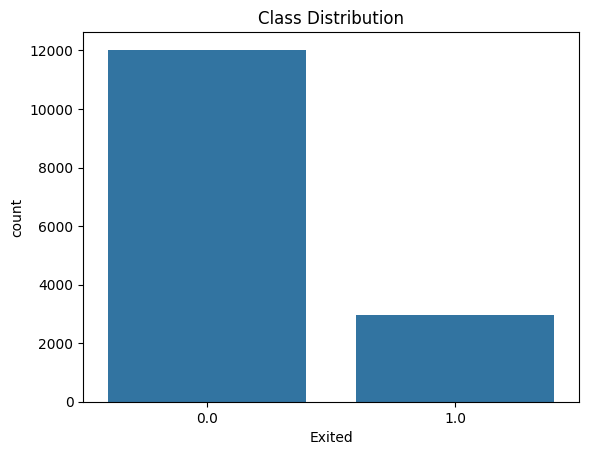

In [12]:
# class distribution
class_dis = df['Exited'].value_counts()/len(df)*100

# plotting
plt.figure(figsize=(7,7))
plt.pie(class_dis, labels=class_dis.index, autopct='%1.2f%%')

plt.title('Class Distribution')
plt.show()

sns.countplot(x='Exited', data=df)
plt.title('Class Distribution')
plt.show()

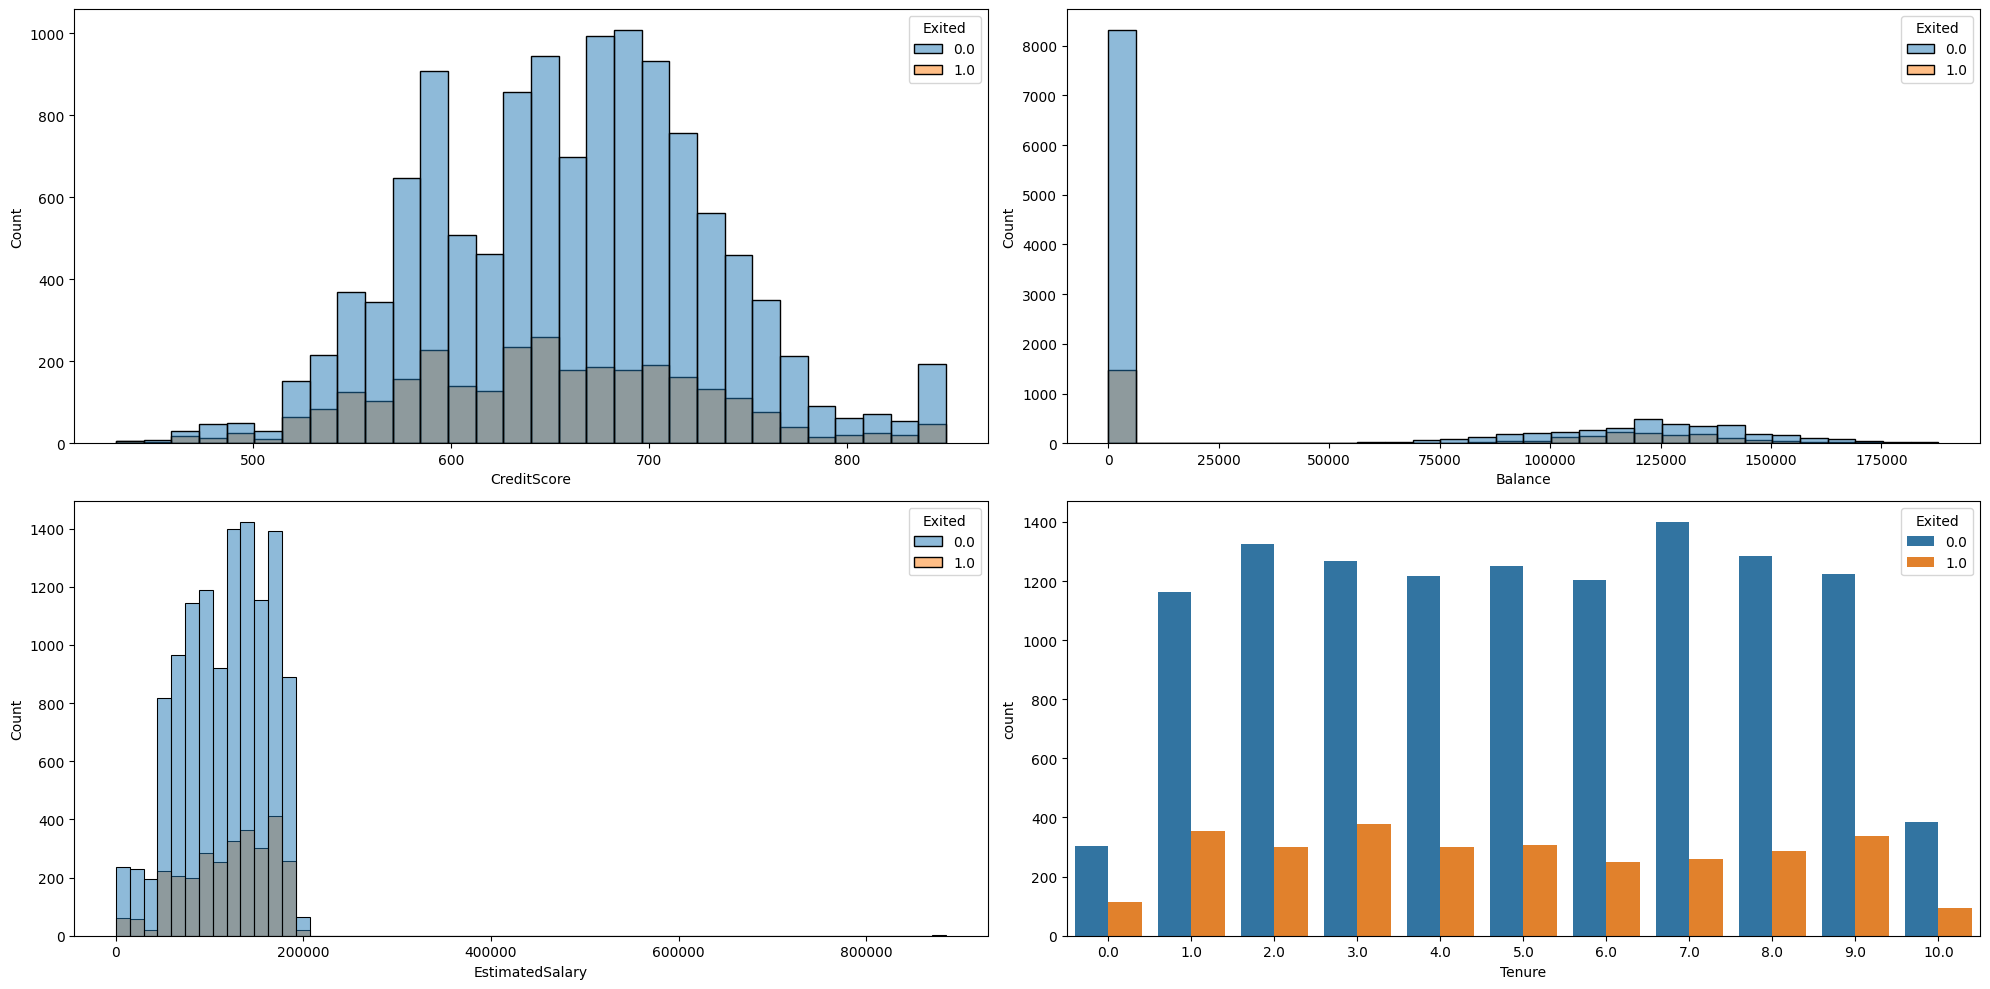

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(x='CreditScore', bins=30, data=df, hue='Exited', ax=ax[0, 0])
sns.histplot(x='Balance', data=df, bins=30, hue='Exited', ax=ax[0, 1])
sns.histplot(x='EstimatedSalary', bins=60, data=df, hue='Exited', ax=ax[1, 0])

sns.countplot(x='Tenure', data=df, hue='Exited', ax=ax[1, 1])

plt.tight_layout()
plt.show()

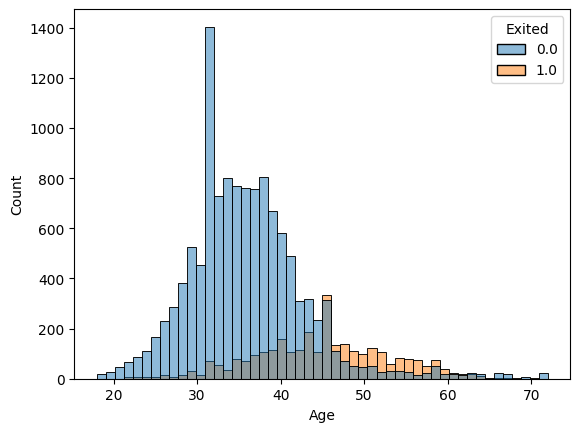

In [14]:
sns.histplot(x='Age', bins=50, data=df, hue='Exited')
plt.show()

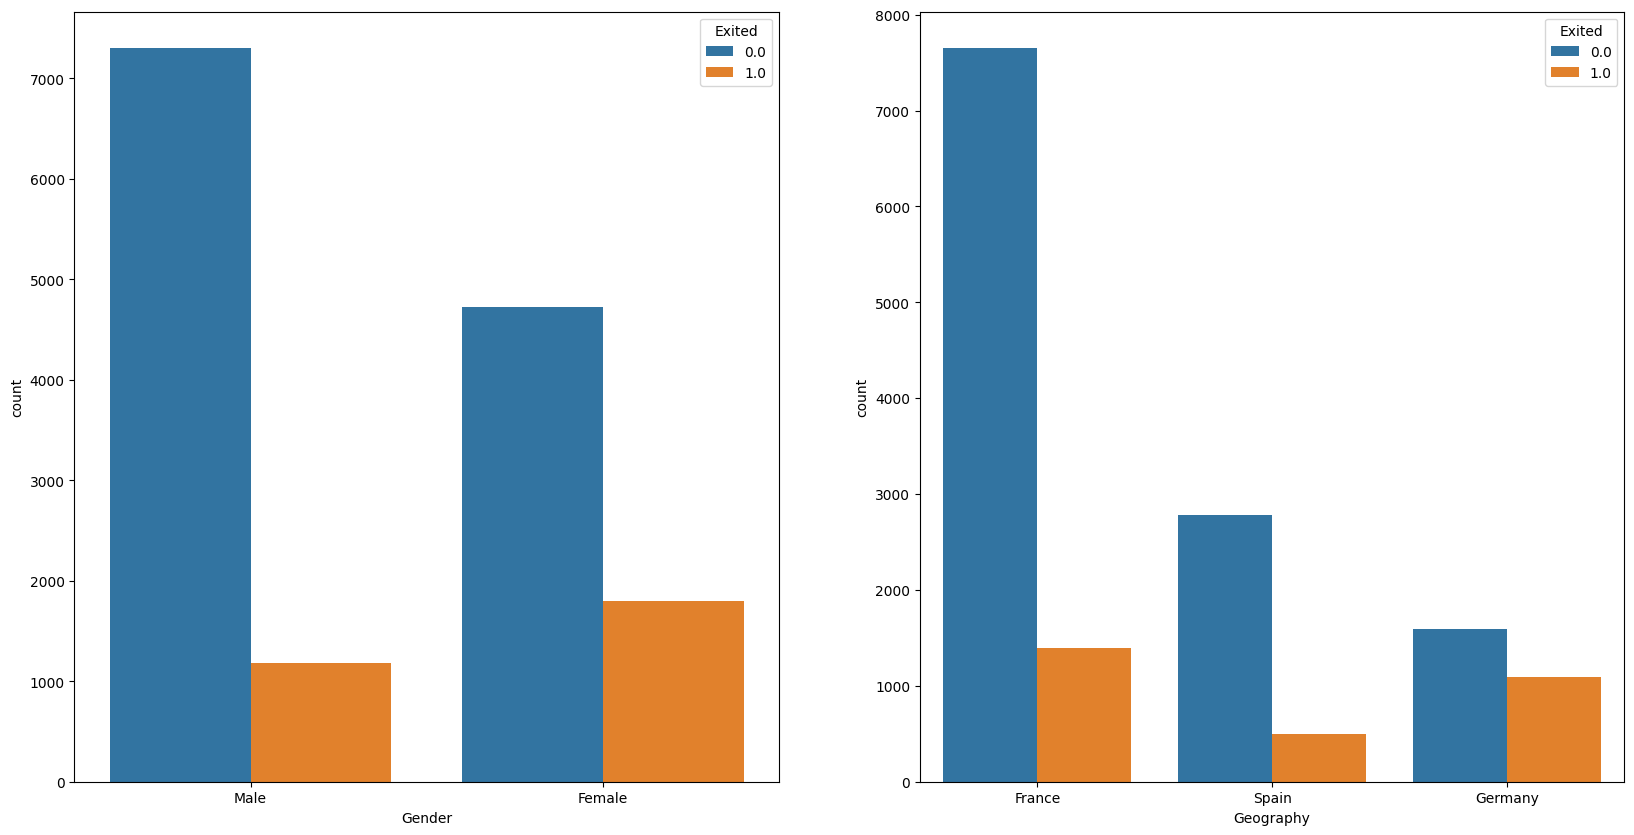

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0])
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[1])
plt.show()

Data Preprocessing

In [16]:
# Kategoriyali va raqamli ustunlarni ajratish

categorical_columns = ['Gender', 'Geography']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

In [17]:
X = df[categorical_columns + numerical_columns]
y = df[target]

In [18]:
# Ma'lumotlarni o‘qitish va test to‘plamlariga bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Modelling

In [19]:
# CatBoostClassifier modelini yaratish
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    auto_class_weights='Balanced',
    cat_features=categorical_columns,
    eval_metric='AUC',
    early_stopping_rounds=50,
    task_type='GPU',
    verbose=100,
    random_seed=42
)

In [20]:
# Modelni o‘qitish
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9036894	best: 0.9036894 (0)	total: 443ms	remaining: 7m 22s
100:	test: 0.9334164	best: 0.9334164 (100)	total: 5.73s	remaining: 51s
bestTest = 0.9339726567
bestIteration = 138
Shrink model to first 139 iterations.


In [21]:
# Bashorat qilish
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [22]:
# Natijalarni baholash
print("AUC Skori:", roc_auc_score(y_test, y_pred_proba))
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBaholash hisoboti:\n", classification_report(y_test, y_pred))

AUC Skori: 0.9339726410314646
Aniqlik (Accuracy): 0.8576666666666667

Baholash hisoboti:
               precision    recall  f1-score   support

         0.0       0.96      0.85      0.91      2405
         1.0       0.60      0.87      0.71       595

    accuracy                           0.86      3000
   macro avg       0.78      0.86      0.81      3000
weighted avg       0.89      0.86      0.87      3000



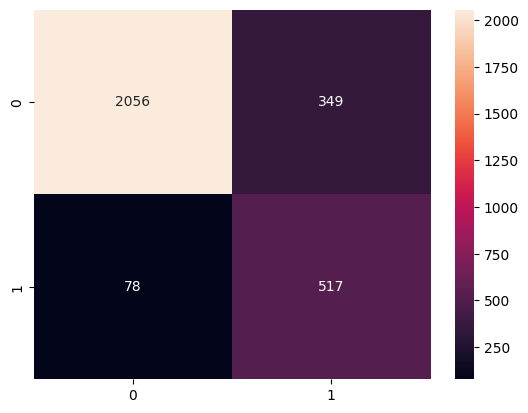

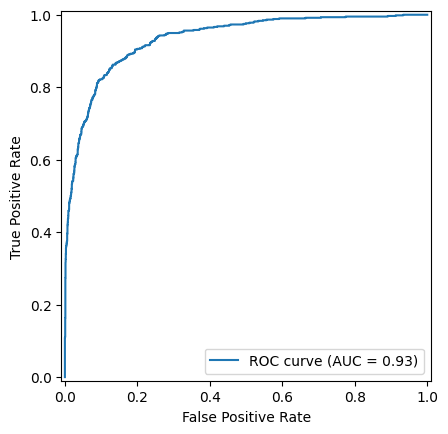

In [23]:
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [24]:
#  Muhim xususiyatlarni chiqarish
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.get_feature_importance()
}).sort_values(by='Importance', ascending=False)
print("\nXususiyatlarning ahamiyati:\n", feature_importance)


Xususiyatlarning ahamiyati:
            Feature  Importance
6    NumOfProducts   46.137366
3              Age   24.007036
8   IsActiveMember    7.607361
5          Balance    7.206952
1        Geography    6.720756
0           Gender    3.673140
2      CreditScore    2.039485
9  EstimatedSalary    1.449664
4           Tenure    1.087346
7        HasCrCard    0.070894


Test_set va Submission

In [25]:
test = pd.read_csv('/content/bank_data/test.csv')
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15732563.0,Hs?,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,15001,15727041.0,Ma,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,15002,15753679.0,K?,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,15003,15581554.0,H?,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,15004,15773723.0,Bellucci,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


In [26]:
# Id ustunini saqlab qo'yish
t_ids = test['id']
t_ids.head()

,id
0,15000
1,15001
2,15002
3,15003
4,15004


In [27]:
# keraksiz ustunlarni olib tashlash
df1 = test.drop(columns=['id', 'CustomerId', 'Surname'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


In [28]:
# Kategorik va numeric ustunlarga ajratish
categorical_columns = ['Gender', 'Geography']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [29]:
X = test[categorical_columns + numerical_columns]

In [30]:
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]


In [31]:
y_pred_proba

array([0.11518147, 0.46402608, 0.16461796, ..., 0.99700067, 0.02128447,
       0.53181342])

In [33]:
# Submission Dataframe yaratish
submission = pd.DataFrame({
    'id': t_ids,
    'Exited': y_pred_proba
})

# CSV faylga saqlash
submission.to_csv('submission.csv', index=False)
print("Submission fayli: submission.csv")

Submission fayli: submission.csv
